In [1]:
import matplotlib.pyplot as plt
import collections
import quantities as pq
import izhikevich as izhi
import numpy as np
%matplotlib inline
from utils import reduced_cells

DELAY = 0*pq.ms
DURATION = 250 *pq.ms

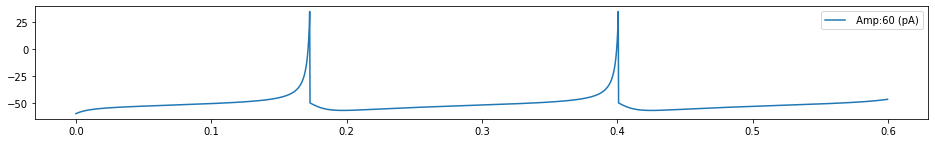

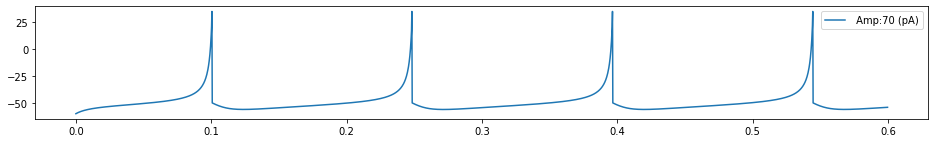

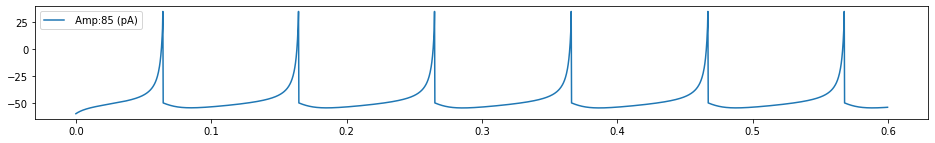

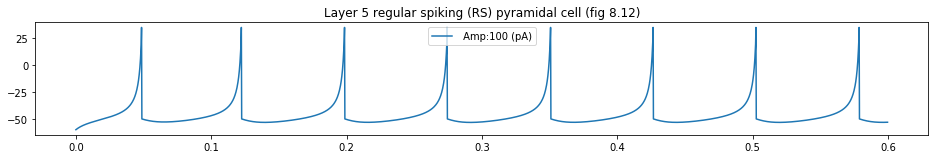

In [2]:
IinRange = [60,70,85,100];

params = {}
params['amplitude'] = 500*pq.pA
params['delay'] = DELAY
params['duration'] = 600*pq.ms


for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['RS'])
    params['amplitude'] = amp
    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.legend()
plt.title('Layer 5 regular spiking (RS) pyramidal cell (fig 8.12)')
plt.show()


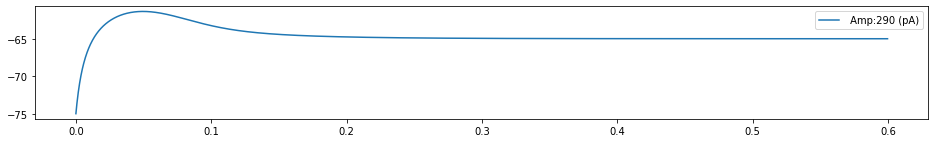

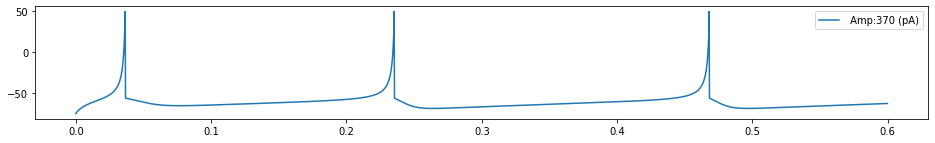

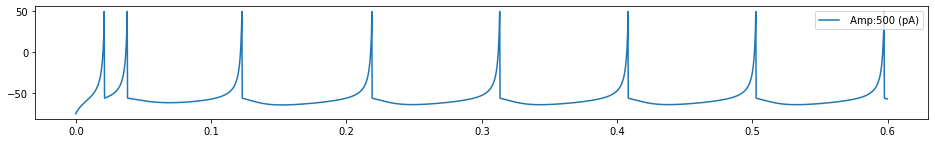

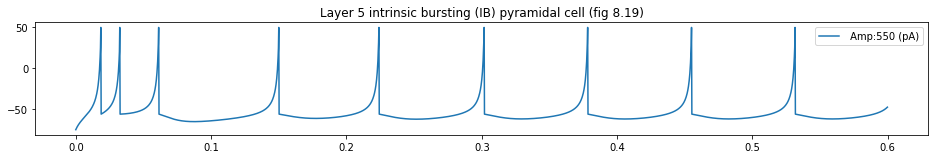

In [3]:
IinRange = [290,370,500,550];

params = {}
#params['amplitude'] = 500*pq.pA
params['delay'] = DELAY
params['duration'] = 600*pq.ms


for i,amp in enumerate(IinRange):

    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['IB'])
    #print(model.attrs)
    #print("C=150; k=1.2; vr=-75; vt=-45; vpeak=50; a=0.01; b=5; c=-56; d=130; celltype=2")
    params['amplitude'] = amp
    #params['duration'] = DURATION

    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.legend()
plt.title('Layer 5 intrinsic bursting (IB) pyramidal cell (fig 8.19)')
plt.show()

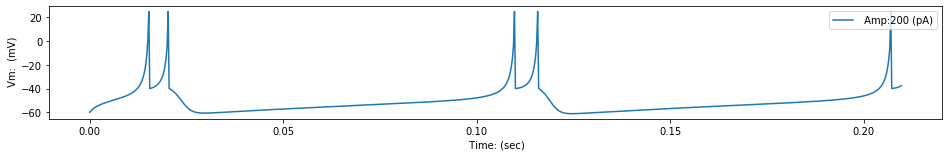

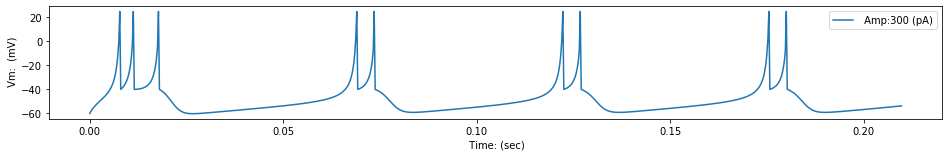

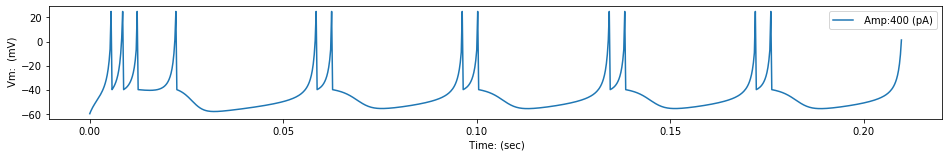

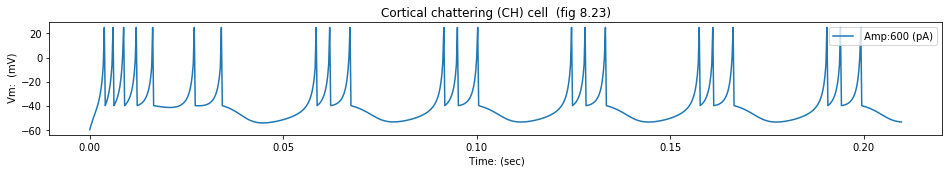

In [4]:
IinRange = [200,300,400,600];

params = {}
params['delay'] = DELAY
params['duration'] = 210*pq.ms


for i,amp in enumerate(IinRange):

    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['CH'])
    #print(model.attrs)
    #print("C=50; k=1.5; vr=-60; vt=-40; vPeak=25; a=0.03; b=1; c=-40; d=150; celltype=3;")
    params['amplitude'] = amp
    #params['duration'] = DURATION

    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))

    plt.legend()
plt.title('Cortical chattering (CH) cell  (fig 8.23)')
#T=210;
#figtitle = 'Cortical chattering (CH) cell  (fig 8.23)';

plt.show()

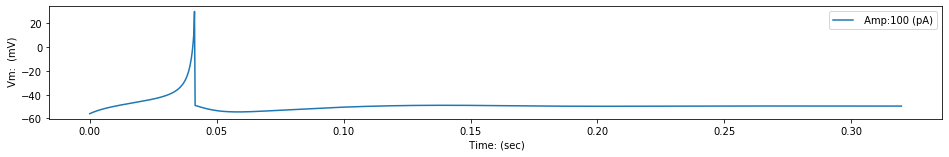

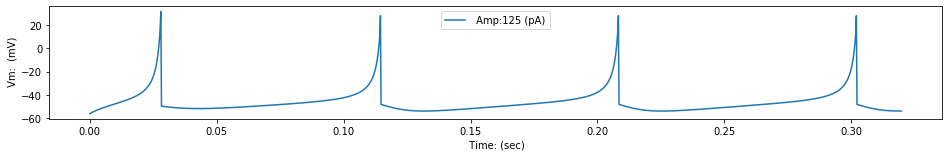

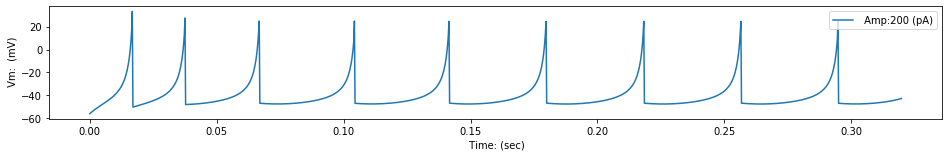

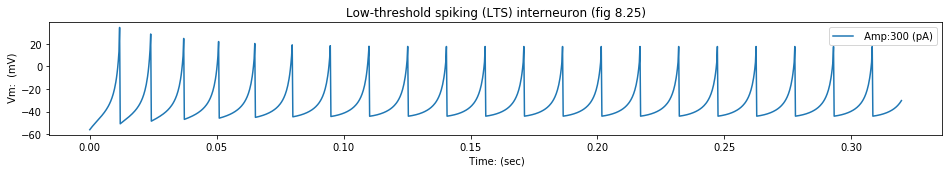

In [5]:
IinRange = [100,125,200,300];

params = {}
params['delay'] = DELAY


T=320;
figtitle = 'Low-threshold spiking (LTS) interneuron (fig 8.25)';
params['duration'] = T*pq.ms


for i,amp in enumerate(IinRange):

    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['LTS'])
    params['amplitude'] = amp

    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.figure(figsize=(16,12))

    plt.subplot(5,1,i+1)

    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))

    plt.legend()
plt.title(figtitle)

plt.show()

# Burst mode

(3, 3080)

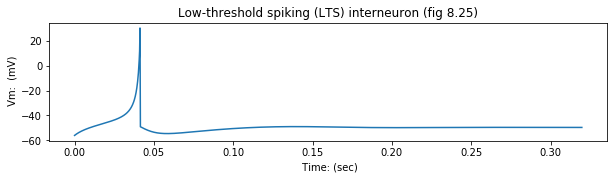

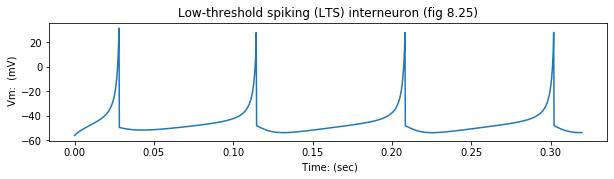

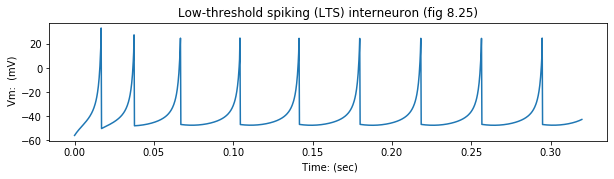

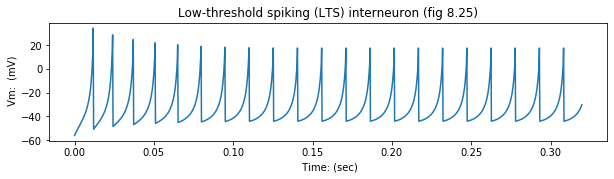

In [24]:
'''
T=320;
IinRange = [100,125,200,300];
figtitle = 'Low-threshold spiking (LTS) interneuron (fig 8.25)';
for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()
    plt.figure(figsize=(10,10))
    model.set_attrs(reduced_cells['LTS'])
    params['amplitude'] = amp
    params['duration'] = T
    model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.subplot(4,1,i+1)
    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))
    plt.title(figtitle)
    plt.show()
'''


<Figure size 720x720 with 0 Axes>

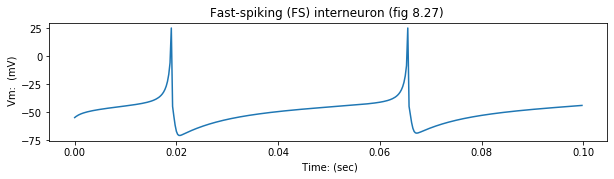

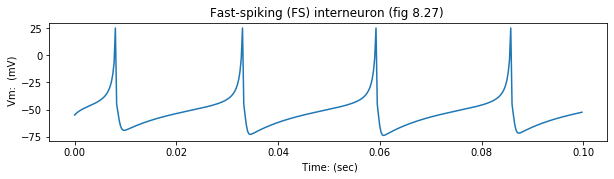

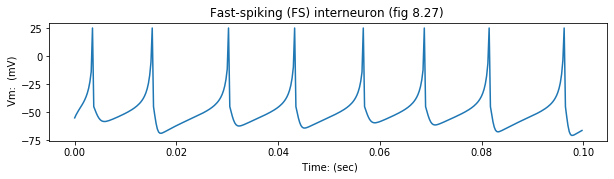

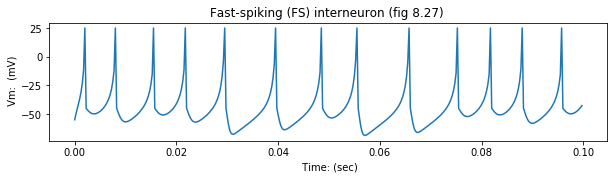

In [26]:

#% FS - Layer 5 rat visual cortex fast-spiking (FS) interneuron (fig8.27 from 2007 book)
#elseif strcmp(testModel, 'FS')
T=100;
IinRange = [73.2,100,200,400];
#IinRange = [73.2,100,200,400];

figtitle = 'Fast-spiking (FS) interneuron (fig 8.27) ';
plt.figure(figsize=(10,10))

for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()
    
    plt.figure(figsize=(10,10))

    model.set_attrs(reduced_cells['FS'])
    params['amplitude'] = amp
    params['duration'] = T
    #print(model.attrs)
    #print("C=20; k=1; vr=-55; vt=-40; vpeak=25; a=0.2; b=-2; c=-45; d=-55; celltype=5;")
    model.inject_square_current(params)
    vm = model.get_membrane_potential()

    plt.subplot(4,1,i+1)
    #plt.clf()
    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))
    #plt.show()
    #plt.legend()
    plt.title(figtitle)
    plt.show()


# Bursting

In [ ]:



def transform_input(IinRange,Iin0,burstMode=True):
    tau=0.25; #%dt
    index = 0;
    list_currents=[]
    for Iinput in IinRange:
        index = index + 1; #% subplot index
        n=int(np.round(T/tau)); #% number of samples

        if burstMode:
            n0 = int(120/tau); #% initial period of 120 ms to lower Vrmp to -80mV
            I=list(Iin0*np.ones(n0)[:])
            Ipart=list(Iinput*np.ones(n)[:])
            I.extend(Ipart);#% 2 different pulses of input DC current
            n = n+n0;
        else:
            I=list(Iinput*np.ones(n));#% pulse of input DC current
        list_currents.append(I)
    return list_currents
Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
IinRange = [0,50,100];
T=650;
IinRange = transform_input(IinRange,Iin0,burstMode=True)
np.shape(IinRange)

<Figure size 720x720 with 0 Axes>

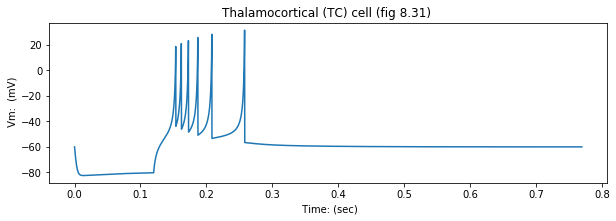

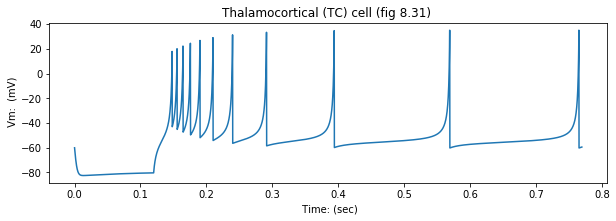

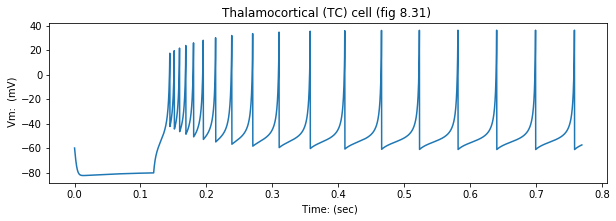

In [19]:


#T=650;
figtitle = 'Thalamocortical (TC) cell (fig 8.31) ';
Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
#reduced_cells['TC']['celltype'] = 6
#fig = 
plt.figure(figsize=(10,10))

for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()
    
    #reduced_cells['TC']['a'] = 0.01
    #print(amp)
    #break
    plt.figure(figsize=(10,10))

    model.set_attrs(reduced_cells['TC'])
    vm = model.inject_direct_current(amp)
    #vm = model.get_membrane_potential()
    #break
    plt.subplot(3,1,i+1)
    #plt.clf()
    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))
    #plt.show()
    #plt.legend()
    plt.title(figtitle)
    plt.show()


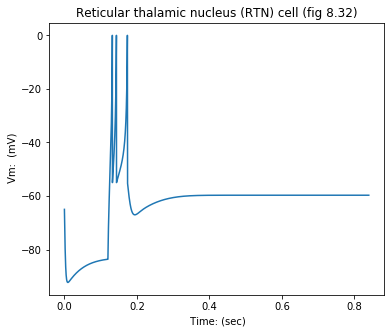

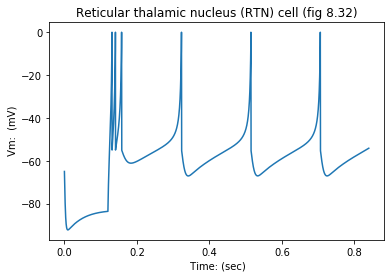

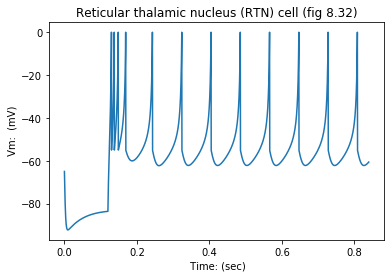

In [28]:

plt.figure(figsize=(6,5))
import numpy as np
#Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
#IinRange = [0,50,100];
#T=650;

Iin0 = -350;
IinRange = [30,50,90];
T=720;

IinRange = transform_input(IinRange,Iin0,burstMode=True)
np.shape(IinRange)


T=650;
figtitle = 'Reticular thalamic nucleus (RTN) cell (fig 8.32)';
Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
#reduced_cells['TC']['celltype'] = 6
for i,amp in enumerate(IinRange):
    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells['RTN'])
    vm = model.inject_direct_current(amp)
    #vm = model.get_membrane_potential()

    plt.subplot(3,1,i+1)
    plt.clf()
    plt.plot(vm.times,vm.magnitude,label=str(' Amp:')+str(amp)+str(' (pA)'))
    plt.xlabel(str(' Time:' )+str(' (sec)'))
    plt.ylabel(str(' Vm: ')+str(' (mV)'))
    #plt.legend()
    plt.title(figtitle)
    plt.show()
    


In [10]:
'''
    if burstMode
        Iin0 = -350;
        IinRange = [30,50,90];
        T=720;
    else
        IinRange = [50,70,110];
        T=650;
figtitle = 'Reticular thalamic nucleus (RTN) cell (fig 8.32)';
C=40; k=0.25; vr=-65; vt=-45; vpeak=0; a=0.015; b=10; c=-55; d=50; celltype=7;
'''

SyntaxError: invalid syntax (<ipython-input-10-d7b71da4a20c>, line 1)

In [ ]:
'''
IinRange = [200,300,400,600]
    
for index,key in enumerate(reduced_cells.keys()):
    for amp in IinRange:

        model = izhi.IZHIModel()
        model.set_attrs(reduced_cells[key])
        params['amplitude'] = amp
        #if amp == -10:
        #    params['duration'] = 50*pq.ms
        #else:
        params['duration'] = DURATION
            
        model.inject_square_current(params)
        vm = model.get_membrane_potential()
        plt.plot(vm.times,vm.magnitude,label=str(amp)+str(key))
        plt.legend()
        plt.show()
        
'''

In [ ]:
'''
def inject_and_plot(testModel,reduced_cells,amp,pulses):
    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells[testModel])
    params['amplitude'] = amp
    model.inject_square_current(params)
    
    
    params['amplitude'] = amp*pq.nA
    params['delay'] = 0
    params['duration'] = 2200*pq.ms
    vm = model.get_membrane_potential()
    plt.plot(vm.times,vm.magnitude,label=str(amp)+str(key))
    plt.legend()
    plt.show()
'''

In [ ]:
#%   This MATLAB file generates figures from the book 
#%               Izhikevich E.M. (2007) 
#%   "Dynamical systems in neuroscience"

#%%%%%%%%%%%%%%% (A) tonic spiking %%%%%%%%%%%%%%%%%%%%%%
#clear all;
#close all;
#%% Set params to reproduce figs from Izhikevich, 2007 (book)
import numpy as np
def strcmp(A,B):
    if A in B: 
        return True
    else:
        return False

tm = ['RS', 'IB', 'CH', 'LTS', 'FS', 'TC', 'RTN']
bm = [0,1]
for testModel in tm:
    #testModel = 'RS'#; % cell type to reproduce (RS, IB, CH, LTS, FS, TC, RTN)
    for burstMode in bm:#  = bm[0]#; % tests bursting mode for TC and RTN cells

        #% RS - Layer 5 regular spiking (RS) pyramidal cell (fig 8.12 from 2007 book)
        if strcmp(testModel, 'RS'):
            T=520;
            IinRange = [60,70,85,100];
            figtitle = 'Layer 5 regular spiking (RS) pyramidal cell (fig 8.12)';
            
            #attrs={C=100; k=0.7; vr=-60; vt=-40; vPeak=35; a=0.03; b=-2; c=-50; d=100; celltype=1};

        #% IB -  Layer 5 intrinsically bursting (IB) cell (fig 8.19 from 2007 book)
        elif strcmp(testModel, 'IB'):
            T=600;
            IinRange = [290,370,500,550];
            figtitle = 'Layer 5 intrinsic bursting (IB) pyramidal cell (fig 8.19)';
            C=150; k=1.2; vr=-75; vt=-45; vPeak=50; a=0.01; b=5; c=-56; d=130; celltype=2;

        #% CH - Cat primary visual cortex chattering (CH) cell (fig 8.23 from 2007 book)
        elif strcmp(testModel, 'CH'): 
            T=210;
            IinRange = [200,300,400,600];
            figtitle = 'Cortical chattering (CH) cell  (fig 8.23)';
            C=50; k=1.5; vr=-60; vt=-40; vPeak=25; a=0.03; b=1; c=-40; d=150; celltype=3;

        #% LTS - Rat barrel cortex Low-threshold  spiking (LTS) interneuron (fig 8.25 from 2007 book)
        elif strcmp(testModel, 'LTS'):
            T=320;
            IinRange = [100,125,200,300];
            figtitle = 'Low-threshold spiking (LTS) interneuron (fig 8.25)';
            C=100; k=1; vr=-56; vt=-42; vPeak=40; a=0.03; b=8; c=-53; d=20; celltype=4;

        #% FS - Layer 5 rat visual cortex fast-spiking (FS) interneuron (fig8.27 from 2007 book)
        elif strcmp(testModel, 'FS'):
            T=100;
            IinRange = [73.2,100,200,400];
            figtitle = 'Fast-spiking (FS) interneuron (fig 8.27) ';
            C=20; k=1; vr=-55; vt=-40; vPeak=25; a=0.2; b=-2; c=-45; d=-55; celltype=5;

        #% TC - Cat dorsal LGN thalamocortical (TC) cell (fig 8.31 from 2007 book)
        elif strcmp(testModel, 'TC'):
            T=650;
            if burstMode:
                Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
                IinRange = [0,50,100];
            else:
                IinRange = [50,100,150];
            #end
            figtitle = 'Thalamocortical (TC) cell (fig 8.31) ';
            C=200; k=1.6; vr=-60; vt=-50; vpeak=35; a=0.01; b=15; c=-60; d=10; celltype=6;

        #% RTN - Rat reticular thalamic nucleus (RTN) cell  (fig8.32 from 2007 book)
        elif strcmp(testModel, 'RTN'):
            if burstMode:
                Iin0 = -350;
                IinRange = [30,50,90];
                T=720;
            else:
                IinRange = [50,70,110];
                T=650;
            figtitle = 'Reticular thalamic nucleus (RTN) cell (fig 8.32)';
            #C=40; k=0.25; vr=-65; vt=-45; vpeak=0; a=0.015; b=10; c=-55; d=50; celltype=7;
            pulse = model.pulse()
            model.get_vm_seven(C=89.7960714285714,
                     a=0.01, b=15, c=-60, d=10, k=1.6,
                     vPeak=(86.364525297619-65.2261863636364),
                      vr=-65.2261863636364, vt=-50,
                      N=0,start=0,stop=0,amp=0,ramp=None,pulse=None)
        #%% Code to implement artificial neuron model        

        tau=0.25; # %dt
        index = 0;
        #figure('Position', [50, 50, 550, 750]);

        for Iinput in IinRange:
            Iin0 = -1200; #% required to lower Vrmp to -80mV for 120 ms
            Iin0 = -350;

            index = index + 1; #% subplot index
            n=int(round(T/tau));# % number of samples

            if burstMode:
                n0 = int(120/tau); #% initial period of 120 ms to lower Vrmp to -80mV
                pulses=[Iin0*np.ones(n0),Iinput*np.ones(n)];#% 2 different pulses of input DC current
                n = n+n0;
            else:
                pulses=[Iinput*np.ones(n)];#% pulse of input DC current
                
        ###
        #
        #
        #
        ###
        for amp in IinRange:
            inject_and_plot(testModel,reduced_cells,amp,pulses)
    
    #% plot V
    #subplot(length(IinRange),1,length(IinRange)-index+1); # plot
    #plot(tau*(1:n), v);
    
    #xlabel(['t (ms)     (Iin=', num2str(round(I(i))),' pA)']);
    #xlim([0,n*tau])
    #ylabel('V (mV)')
    # 
    # fileName = strcat('results/',testModel,'2007_',num2str(Iinput),'.dat');
    #fileID = fopen(fileName,'w'); A = [times; v; u];fprintf(fileID,'%f\t%f\t%f\n',A);fclose(fileID);

    #if index == length(IinRange), title(figtitle); end


In [ ]:
#%%timeit
'''
model = izhi.IZHIModel()
#model.set_attrs(reduced_cells[key])
model.inject_square_current(params)
vm = model.get_membrane_potential()
plt.plot(vm.times,vm.magnitude)
'''

In [ ]:
#%%timeit
'''
for index,key in enumerate(reduced_cells.keys()):
    reduced_cells[key] = {}
    for k,v in trans_dict.items():
        reduced_cells[key][k] = v[index]
    
    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells[key])
    model.inject_square_current(params)
    vm = model.get_membrane_potential()
'''

In [ ]:
def run_ramp_simulation(key,reduced_cells,wave_form={},t_stop=300.0, title='(G) Class 1 excitable'):
    model = izhi.IZHIModel()
    model.set_attrs(reduced_cells[key])
    vm = model.inject_ramp_current(t_stop, gradient = wave_form['gradient'], onset = wave_form['onset'], baseline= wave_form['baseline'], t_start=0.0)
    #print(vm)
    #return vm
    #model.inject_square_current(params)
    vm = model.get_membrane_potential()
    plt.plot(vm.times,vm.magnitude)
    plt.show()
    return vm


In [ ]:
for index,key in enumerate(reduced_cells.keys()):
    #reduced_cells[key] = {}
    #for k,v in trans_dict.items():
    #    reduced_cells[key][k] = v[index]
    



    t_stop = 3000.0
    run_ramp_simulation(key,reduced_cells,wave_form={'gradient':0.075, 'onset':0, 'baseline': t_stop*100},
                   t_stop=t_stop, title='(G) Class 1 excitable')

    # == Sub-plot H: Class 2 excitable ==========================================

    t_stop = 3000.0
    run_ramp_simulation(key,reduced_cells,
                   wave_form={'gradient':0.015, 'onset':0, 'baseline':t_stop*100},
                   t_stop=t_stop, title='(H) Class 2 excitable')


In [ ]:
fig = plt.figure(1, facecolor='white', figsize=(6, 6))
model = izhi.IZHIModel()
    
#gs = gridspec.GridSpec(5, 4)
#gs.update(hspace=0.5, wspace=0.4)

# == Sub-plot A: Tonic spiking ==============================================

t_stop = 100.0
model.attrs.update({'a':0.02, 'b':0.2, 'c':-65.0, 'd':6.0, 'vr':-70.0})

params['amplitude'] = 250*pq.pA
params['delay'] = 0
params['duration'] = 2200*pq.ms

model.inject_square_current(params)
vm = model.get_membrane_potential()
plt.plot(vm.times,vm.magnitude)
plt.show()
#               waveform=step(0.014, t_stop),
#               t_stop=t_stop, title='(A) Tonic spiking',
#               label_scalebar=True, save_data=True)

# == Sub-plot B: Phasic spiking =============================================

model.attrs.update({'a':0.02, 'b':0.25, 'c':-65.0, 'd':6.0, 'vr':-64.0})

params['amplitude'] = 150*pq.pA
params['delay'] = 0
params['duration'] = 2200*pq.ms

model.inject_square_current(params)
vm = model.get_membrane_potential()
plt.plot(vm.times,vm.magnitude)
plt.show()
#t_stop = 200.0
#run_simulation(a=0.02, b=0.25, c=-65.0, d=6.0, v_init=-64.0,
#               waveform=step(0.0005, t_stop),
#               t_stop=t_stop, title='(B) Phasic spiking')
#
# == Sub-plot C: Tonic bursting =============================================

#t_stop = 220.0
#run_simulation(a=0.02, b=0.2, c=-50.0, d=2.0, v_init=-70.0,
#               waveform=step(0.015, t_stop),
#               t_stop=t_stop, title='(C) Tonic bursting', save_data=True)

model.attrs.update({'a':0.02, 'b':0.2, 'c':-50.0, 'd':2.0, 'vr':-70.0})

params['amplitude'] = 250*pq.pA
params['delay'] = 0
params['duration'] = 2200*pq.ms

model.inject_square_current(params)
vm = model.get_membrane_potential()
plt.plot(vm.times,vm.magnitude)
plt.show()

In [ ]:

# == Sub-plot D: Phasic bursting ============================================
'''
t_stop = 200.0
run_simulation(a=0.02, b=0.25, c=-55.0, d=0.05, v_init=-64.0,
               waveform=step(0.0006, t_stop),
               t_stop=t_stop, title='(D) Phasic bursting')

# == Sub-plot E: Mixed mode =================================================

t_stop = 160.0
run_simulation(a=0.02, b=0.2, c=-55.0, d=4.0, v_init=-70.0,
               waveform=step(0.01, t_stop),
               t_stop=t_stop, title='(E) Mixed mode')

# == Sub-plot F: Spike Frequency Adaptation (SFA) ===========================

t_stop = 85.0
run_simulation(a=0.01, b=0.2, c=-65.0, d=8.0, v_init=-70.0,
               waveform=step(0.03, t_stop),
               t_stop=t_stop, title='(F) SFA')

# == Sub-plot G: Class 1 excitable ==========================================


Note: This simulation is supposed to use a different parameterization of the
      model, i.e.
            V' = tau*(0.04*V^2 + 4.1*V + 108 -u + I)
      as opposed to
            V' = tau*(0.04*V^2 + 5*V + 140 - u + I)
The alternative parameterization is not currently available in PyNN, therefore
the results of this simulation are not expected to match the original figure.


t_stop = 300.0
run_simulation(a=0.02, b=0.2, c=-65.0, d=6.0, v_init=-70.0,
               waveform=ramp(0.000075, 30.0, t_stop),
               t_stop=t_stop, title='(G) Class 1 excitable')

# == Sub-plot H: Class 2 excitable ==========================================

t_stop = 300.0
run_simulation(a=0.2, b=0.26, c=-65.0, d=0.0, v_init=-64.0,
               waveform=ramp(0.000015, 30.0, t_stop, baseline=-0.0005),
               t_stop=t_stop, title='(H) Class 2 excitable')

# == Sub-plot I: Spike latency ==============================================

t_stop = 100.0
run_simulation(a=0.02, b=0.2, c=-65.0, d=6.0, v_init=-70.0,
               waveform=pulse(0.00671,  # 0.00704 in original
                              [10], 3, t_stop),
               t_stop=t_stop, title='(I) Spike latency',
               scalebar_level=0.5)

# == Sub-plot J: Subthreshold oscillation ===================================

t_stop = 200.0
run_simulation(a=0.05, b=0.26, c=-60.0, d=0.0, v_init=-62.0,
               waveform=pulse(0.002, [20], 5, t_stop),
               t_stop=t_stop, title='(J) Subthreshold oscillation',
               scalebar_level=0.5)

# == Sub-plot K: Resonator ==================================================

t_stop = 400.0
T1 = t_stop / 10
T2 = T1 + 20
T3 = 0.7 * t_stop
T4 = T3 + 40
run_simulation(a=0.1, b=0.26, c=-60.0, d=-1.0, v_init=-62.0,
               waveform=pulse(0.00065, [T1, T2, T3, T4], 4, t_stop),
               t_stop=t_stop, title='(K) Resonator',
               scalebar_level=0.5)

# == Sub-plot L: Integrator =================================================


Note: This simulation is supposed to use a different parameterization of the
      model, i.e.
            V' = tau*(0.04*V^2 + 4.1*V + 108 -u + I)
      as opposed to
            V' = tau*(0.04*V^2 + 5*V + 140 - u + I)
The alternative parameterization is not currently available in PyNN, therefore
the results of this simulation are not expected to match the original figure.


t_stop = 100.0
T1 = t_stop / 11
T2 = T1 + 5
T3 = 0.7 * t_stop
T4 = T3 + 10
run_simulation(a=0.02, b=-0.1, c=-55.0, d=6.0, v_init=-60.0,
               waveform=pulse(0.009, [T1, T2, T3, T4], 2, t_stop),
               t_stop=t_stop, title='(L) Integrator',
               scalebar_level=0.5)

# == Sub-plot M: Rebound spike ==============================================

t_stop = 200.0
run_simulation(a=0.03, b=0.25, c=-60.0, d=4.0, v_init=-64.0,
               waveform=pulse(-0.015, [20], 5, t_stop),
               t_stop=t_stop, title='(M) Rebound spike')

# == Sub-plot N: Rebound burst ==============================================

t_stop = 200.0
run_simulation(a=0.03, b=0.25, c=-52.0, d=0.0, v_init=-64.0,
               waveform=pulse(-0.015, [20], 5, t_stop),
               t_stop=t_stop, title='(N) Rebound burst')

# == Sub-plot O: Threshold variability ======================================

t_stop = 100.0
times = np.array([0, 10, 15, 70, 75, 80, 85, t_stop])
amps = np.array([0, 0.001, 0, -0.006, 0, 0.001, 0, 0])
run_simulation(a=0.03, b=0.25, c=-60.0, d=4.0, v_init=-64.0,
               waveform=(times, amps),
               t_stop=t_stop, title='(O) Threshold variability')

# == Sub-plot P: Bistability ================================================

t_stop = 300.0
T1 = t_stop/8
T2 = 208  # 216.0 in original
run_simulation(a=0.1, b=0.26, c=-60.0, d=0.0, v_init=-61.0,
               waveform=pulse(0.00124, [T1, T2], 5, t_stop, baseline=0.00024),
               t_stop=t_stop, title='(P) Bistability',
               scalebar_level=0.5)

# == Sub-plot Q: Depolarizing after-potential ===============================

t_stop = 50.0
run_simulation(a=1.0, b=0.18,  # 0.2 in original
               c=-60.0, d=-21.0, v_init=-70.0,
               waveform=pulse(0.02, [9], 2, t_stop),
               t_stop=t_stop, title='(Q) DAP',
               scalebar_level=0.5)

# == Sub-plot R: Accomodation ===============================================


Note: This simulation is supposed to use a different parameterization of the
      model, i.e.
            u' = tau*a*(b*(V + 65))
      as opposed to
            u' = tau*a*(b*V - u)
The alternative parameterization is not currently available in PyNN, therefore
the results of this simulation are not expected to match the original figure.


t_stop = 400.0

parts = (ramp(0.00004, 0.0, 200.0),
         (np.array([200.0 + global_time_step, 300.0 - global_time_step]), np.array([0.0, 0.0])),
         ramp(0.00032, 300.0, 312.5, t_start=300.0),
         (np.array([312.5 + global_time_step, t_stop]), np.array([0.0, 0.0])))
totalTimes, totalAmps = np.hstack(parts)

run_simulation(a=0.02, b=1.0, c=-55.0, d=4.0, v_init=-65.0, u_init=-16.0,
               waveform=(totalTimes, totalAmps),
               t_stop=t_stop, title='(R) Accomodation',
               scalebar_level=0.5)

# == Sub-plot S: Inhibition-induced spiking =================================

t_stop = 350.0
run_simulation(a=-0.02, b=-1.0, c=-60.0, d=8.0, v_init=-63.8,
               waveform=pulse(0.075, [50], 170,  # 200 in original
                              t_stop, baseline=0.08),
               t_stop=t_stop, title='(S) Inhibition-induced spiking')

# == Sub-plot T: Inhibition-induced bursting ================================


Modifying parameter d from -2.0 to -0.7 in order to reproduce Fig. 1
'

t_stop = 350.0
run_simulation(a=-0.026, b=-1.0, c=-45.0, d=-0.7, v_init=-63.8,
               waveform=pulse(0.075, [50], 200, t_stop, baseline=0.08),
               t_stop=t_stop, title='(T) Inhibition-induced bursting')


# == Export figure in PNG format ============================================

filename = normalized_filename("results", "izhikevich2004", "png", options.simulator)
try:
    os.makedirs(os.path.dirname(filename))
except OSError:
    pass
fig.savefig(filename)

print("\n  Simulation complete. Results can be seen in figure at %s\n"%(filename))
'''


In [ ]:
c
